# GPU Pooling with TensorFlow and NVidia CUDA

<img src='./imgs/bizz.jpg'/>

In [45]:
# http://localhost:8888/notebooks/1_Image_Metadata.ipynb
from AI_Decomposed import image_meta 
from AI_Decomposed import display_channel

# Small Tensorflow tutorial

For simplicity, all the previous notebooks have been using standard Python lists.
Tensorflow uses 'tensors' in a 'flow'.  

### 0. start Tensorflow session

In [63]:
config = tf.ConfigProto(device_count = {'GPU': 0}) 
sess = tf.InteractiveSession(config=config)

### 1. create sample list

In [64]:
lst = [0,1,2,3]
lst

[0, 1, 2, 3]

### 2. create 2x2 tensor

In [65]:
t2x2 = tf.reshape(lst,[2,2]) # convert to 2 x 2 tensor
t2x2

<tf.Tensor 'Reshape_7:0' shape=(2, 2) dtype=int32>

### 3. proof 

In [66]:
print(t2x2.eval())  # show 2 x 2 matrix

[[0 1]
 [2 3]]


### 4. clean up

In [67]:
del lst 
del t2x2
sess.close()
del sess

# GPU Pooling with Tensorflow

In [78]:
config = tf.ConfigProto(device_count = {'GPU': 0}) 
sess = tf.InteractiveSession(config=config)

### 1. grab green channel from image

In [79]:
image_file = './imgs/bizz.jpg'
[height, width ,red, green, blue] = image_meta(image_file)

403 x 940


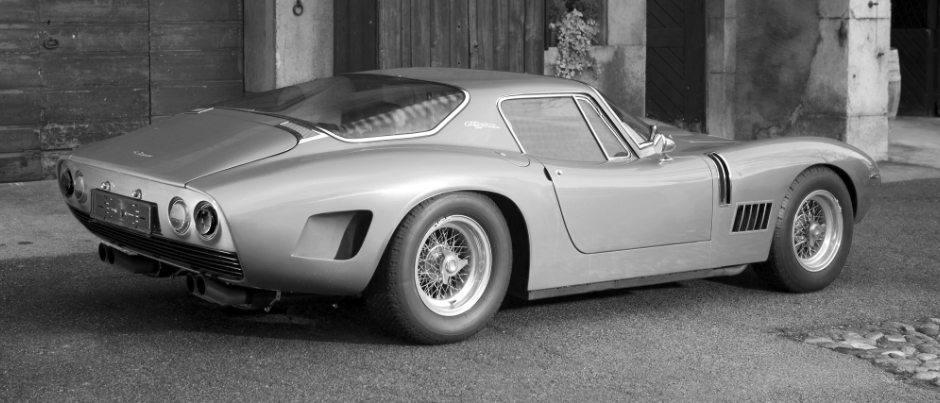

In [80]:
print(height, 'x', width)
display_channel(green, width)

### 2. convert green channel to tensor

In [81]:
green_tensor = tf.reshape(green,[-1, height, width, 1]) # convert to tensor
green_tensor

<tf.Tensor 'Reshape_9:0' shape=(1, 403, 940, 1) dtype=int32>

### 3. apply max pooling

In [82]:
pool = tf.layers.max_pooling2d(inputs=green_tensor, pool_size=[2, 2], strides=2)
pool

<tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(1, 201, 470, 1) dtype=int32>

### 4. back to list

In [83]:
list_pool = pool.eval().flatten()    

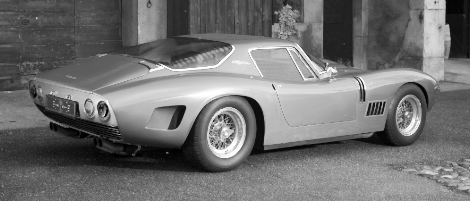

In [84]:
display_channel(list_pool, pool.shape[2].value)

In [85]:
sess.close()
del sess
del list_pool
del green